In [47]:
# Importing Tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
import numpy as np
import random
import matplotlib.pyplot as plt

In [51]:
pwd

'/content/drive/MyDrive/Inputs'

In [41]:
%cd "../content/drive/MyDrive/Inputs"

[Errno 2] No such file or directory: '../content/drive/MyDrive/Inputs'
/content/drive/MyDrive/Inputs


In [52]:
pwd

'/content/drive/MyDrive/Inputs'

In [53]:
# Load Dataset

x_train = np.loadtxt('input.csv',delimiter = ',')
y_train = np.loadtxt('labels.csv',delimiter = ',')
x_test = np.loadtxt('input_test.csv',delimiter = ',')
y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [54]:
# Pre-Processing Data

x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train),1)
x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)
x_train = x_train/255.0
x_test = x_test/255.0
print("Shape of X_train:", x_train.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of X_train:", x_test.shape)
print("Shape of X_train:", y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_train: (400, 100, 100, 3)
Shape of X_train: (400, 1)


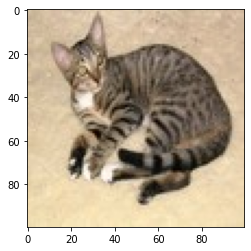

In [55]:
# Checking sample image

idx = random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])
plt.show()

In [56]:
# Model Building

model = Sequential([
    Conv2D(256,(3,3),activation = 'relu',input_shape=(100,100,3)),
    BatchNormalization(),
    MaxPooling2D((4,4)),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.4),
    Dense(1,activation='sigmoid')
])

In [57]:
# Compiling Model

opt = SGD(momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics = ['accuracy'])

In [58]:
# Training Model

model.fit(x_train,y_train,epochs=30,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/30
63/63 [==============================] - 188s 3s/step - loss: 0.8113 - accuracy: 0.5715 - val_loss: 0.7162 - val_accuracy: 0.4950
Epoch 2/30
63/63 [==============================] - 188s 3s/step - loss: 0.6477 - accuracy: 0.6445 - val_loss: 0.7252 - val_accuracy: 0.5225
Epoch 3/30
63/63 [==============================] - 180s 3s/step - loss: 0.5962 - accuracy: 0.6820 - val_loss: 0.7925 - val_accuracy: 0.5100
Epoch 4/30
63/63 [==============================] - 175s 3s/step - loss: 0.5564 - accuracy: 0.7175 - val_loss: 0.8883 - val_accuracy: 0.5275
Epoch 5/30
63/63 [==============================] - 175s 3s/step - loss: 0.5273 - accuracy: 0.7430 - val_loss: 0.7309 - val_accuracy: 0.5900
Epoch 6/30
63/63 [==============================] - 181s 3s/step - loss: 0.4713 - accuracy: 0.7715 - val_loss: 0.8407 - val_accuracy: 0.6050
Epoch 7/30
63/63 [==============================] - 171s 3s/step - loss: 0.4417 - accuracy: 0.7945 - val_loss: 1.0461 - val_accuracy: 0.5650
Epoch 8/30
63

In [59]:
# Evaluating Results on Test Dataset

model.evaluate(x_test,y_test)

13/13 [==============================] - 6s 469ms/step - loss: 1.1266 - accuracy: 0.7475


[1.1266374588012695, 0.7475000023841858]

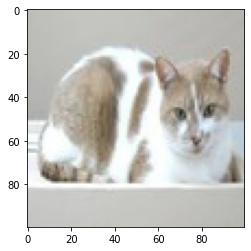

1/1 [==============================] - 0s 212ms/step
Our model says it is a cat


In [60]:
# Making Predictions

idx2 = random.randint(0,len(y_test))
plt.imshow(x_test[idx2,:])
plt.show()
y_pred = model.predict(x_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred==0):
 pred = 'dog'
else:
 pred = 'cat'
print("Our model says it is a",pred)

In [61]:
# Model Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 98, 98, 256)      1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 128)      512       
 hNormalization)                                                 
                                                        

In [62]:
# Printing Score

score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

Test Score:  1.1266374588012695
Test accuracy:  0.7475000023841858
